# Age Model

This note we'll build a CNN to classify the gender problem. To build our CNN we'll use [tensorflow](https://www.tensorflow.org/)

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.helpers import unwrapper_data
from sklearn.model_selection import train_test_split
from glob import glob
%matplotlib inline

## Data

In [2]:
DATA_PATH = 'data/'
data = glob(DATA_PATH+'*.age.pkl')
print(data)

['data/03.age.pkl', 'data/02.age.pkl', 'data/01.age.pkl', 'data/04.age.pkl', 'data/05.age.pkl']


## Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=(100,100,3)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=8, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
activation_4 (Activation)    (None, 25, 25, 128)       0         
__________

## Input

In [4]:
X, y = unwrapper_data(data)
mean_x = np.mean(X)
for i, _ in enumerate(X):
    X[i] -= mean_x
print(mean_x)

0.48440337


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_oh_train = tf.keras.utils.to_categorical(y=y_train, num_classes=8).astype(np.uint8)
y_oh_test =  tf.keras.utils.to_categorical(y=y_test, num_classes=8).astype(np.uint8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14193, 100, 100, 3), (2505, 100, 100, 3), (14193,), (2505,))

## Training

In [8]:
BATCH_SIZE = 64
EPOCHS = 100

In [11]:
list_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                  tf.keras.callbacks.ModelCheckpoint('models/best_model_age.hdf5', monitor='val_loss', verbose=1, save_best_only=True)]
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=X_train, y=y_oh_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=list_callbacks, validation_split=0.15)

Train on 12064 samples, validate on 2129 samples
Epoch 1/100
12032/12064 [============================>.] - ETA: 0s - loss: 2.1257 - acc: 0.3861
Epoch 00001: val_loss improved from inf to 1.79574, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 284s 24ms/step - loss: 2.1253 - acc: 0.3859 - val_loss: 1.7957 - val_acc: 0.4049
Epoch 2/100
12032/12064 [============================>.] - ETA: 0s - loss: 1.7030 - acc: 0.4381
Epoch 00002: val_loss improved from 1.79574 to 1.63402, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 191s 16ms/step - loss: 1.7031 - acc: 0.4381 - val_loss: 1.6340 - val_acc: 0.4725
Epoch 3/100
12032/12064 [============================>.] - ETA: 0s - loss: 1.6721 - acc: 0.4461
Epoch 00003: val_loss improved from 1.63402 to 1.55129, saving model to models/best_model_age.hdf5
12064/12064 [==============================] - 192s 16ms/step - loss: 1.6711 - acc: 0.4465 - val_loss: 1.5513 - va

Epoch 00028: early stopping


In [12]:
print('Train =>', model.evaluate(X_train, y_oh_train, verbose=0))
print('Test =>', model.evaluate(X_test, y_oh_test, verbose=0))

Train => [1.4904809237735968, 0.49059395476853396]
Test => [1.508828360686997, 0.4802395210532609]


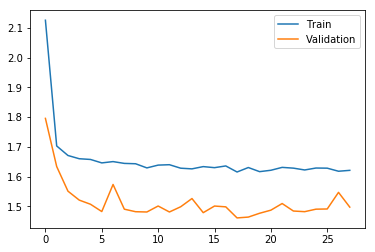

In [13]:
hist_dict = hist.history
loss_val = hist_dict['val_loss']
loss_train = hist_dict['loss']

plt.figure()
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.legend()

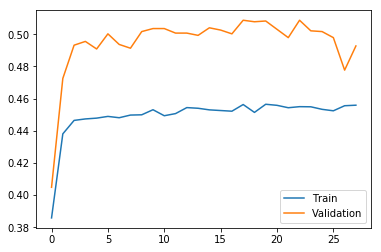

In [14]:
hist_dict = hist.history
acc_val = hist_dict['val_acc']
acc_train = hist_dict['acc']

plt.figure()
plt.plot(acc_train, label='Train')
plt.plot(acc_val, label='Validation')
plt.legend()